In [178]:
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd 
import string 
import spacy # language models
import seaborn as sns
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [179]:
df=pd.read_csv("Elon_musk.csv",encoding="latin-1")
df

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [180]:
df.isnull().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [181]:
df.duplicated().sum()

0

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [183]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [184]:
df

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


# Removing spaces

In [185]:
df= [Text.strip() for Text in df.Text] 

In [186]:
df

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

# Removing empty strings

In [187]:
df = [x for x in df if x]  
df

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [188]:
df= ' '.join(df)  #here we joined it all,we meed to join it so we can tokenise it further
df

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [189]:
nltk.download('punkt')
nltk.download('stopwords')
from nltk import tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DHAVAL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DHAVAL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [190]:
#wherever punctuation considers new sentence inshort it forms meaningful sentences from the raw data
sentences = tokenize.sent_tokenize("".join(df))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [191]:
# convert tokenize sentences in to dataframe for stop words
conv_df = pd.DataFrame(sentences, columns=['sentence'])
conv_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [192]:
stop_word = stopwords.words('english') #we do it to remove certain words without this we can still form meaningful sentences
stop_word

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Removing stop words

In [193]:
#now lets look for the words whcih are not in stopwords

conv_df['no_stopword']= conv_df['sentence'].apply(lambda x: ' '.join([x for x in x.split() if x not in(stop_word)]))

In [194]:
conv_df.sentence

0      @kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1                                     Have you tried it?
2                    @joerogan @Spotify Great interview!
3      @gtera27 Doge is underestimated @teslacn Congr...
4                     Now on to the next for even more!!
                             ...                        
919    @kenyanwalstreet Not actually a payout, just a...
920    It may never pay out, as the stock cant b
 ht...
921                                      Details Aug 28.
922    AI symbiosis while u wait @vistacruiser7 @flcn...
923    @TeslaGong @PPathole Samwise Gamgee @PPathole ...
Name: sentence, Length: 924, dtype: object

In [195]:
conv_df.no_stopword

0      @kunalb11 Im alien @ID_AA_Carmack Ray tracing...
1                                         Have tried it?
2                    @joerogan @Spotify Great interview!
3      @gtera27 Doge underestimated @teslacn Congratu...
4                                   Now next even more!!
                             ...                        
919    @kenyanwalstreet Not actually payout, vesting ...
920    It may never pay out, stock cant b https://t....
921                                      Details Aug 28.
922    AI symbiosis u wait @vistacruiser7 @flcnhvy Th...
923    @TeslaGong @PPathole Samwise Gamgee @PPathole ...
Name: no_stopword, Length: 924, dtype: object

In [196]:
conv_df['clean'] = conv_df['no_stopword'].apply(lambda x: ' '.join([x for x in x.split() if x not in string.punctuation]))

In [197]:
conv_df

,sentence,no_stopword,clean
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...
1,Have you tried it?,Have tried it?,Have tried it?
2,@joerogan @Spotify Great interview!,@joerogan @Spotify Great interview!,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...,@gtera27 Doge underestimated @teslacn Congratu...,@gtera27 Doge underestimated @teslacn Congratu...
4,Now on to the next for even more!!,Now next even more!!,Now next even more!!
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...","@kenyanwalstreet Not actually payout, vesting ...","@kenyanwalstreet Not actually payout, vesting ..."
920,"It may never pay out, as the stock cant b ht...","It may never pay out, stock cant b https://t....","It may never pay out, stock cant b https://t...."
921,Details Aug 28.,Details Aug 28.,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...


In [198]:
conv_df = conv_df.drop(labels = ['sentence','no_stopword'],axis = 1)

In [199]:
#this given certain score for all the words so we can see which is negative positive and all
affin = pd.read_csv("Afinn.csv",encoding="latin-1")
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [200]:
affin_data = affin.set_index('word')['value'].to_dict()
affin_data

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [201]:
NLP = spacy.load('en_core_web_sm')
sentiment_lexicon = affin_data
sentiment_lexicon

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [202]:
def calculate(text: str = None):
    score=0
    if text:
        sentence = NLP(text)
        for word in sentence:
            score+=sentiment_lexicon.get(word.lemma_, 0)
    return score

In [203]:
conv_df['sentiment_df']=conv_df['clean'].apply(calculate) #this score was score regarding to the numbers appearing in the sentence
conv_df

,clean,sentiment_df
0,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...,0
1,Have tried it?,0
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge underestimated @teslacn Congratu...,3
4,Now next even more!!,0
...,...,...
919,"@kenyanwalstreet Not actually payout, vesting ...",0
920,"It may never pay out, stock cant b https://t....",-4
921,Details Aug 28.,0
922,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...,-2


In [204]:
conv_df.sort_values(by = 'sentiment_df').head(10) 

,clean,sentiment_df
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinelo...,-8
64,"Also, road hell mostly paved bad intentions.",-7
611,"Then static fire, checkouts, static fire, fly ...",-4
920,"It may never pay out, stock cant b https://t....",-4
886,This primarily electrical/electronic (chip des...,-4
680,"Occasional flights land ok, frequent (daily) f...",-4
219,@RGVaerialphotos It real soon @MarcusHouseGame...,-3
887,Will write algorithms ever realize negativity ...,-3
380,No problem theres way get current design Cybe...,-3
630,You modern day moron.,-3


In [205]:
conv_df['score']=conv_df['clean'].str.split().apply(len)

In [206]:
conv_df

,clean,sentiment_df,score
0,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...,0,9
1,Have tried it?,0,3
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge underestimated @teslacn Congratu...,3,11
4,Now next even more!!,0,4
...,...,...,...
919,"@kenyanwalstreet Not actually payout, vesting ...",0,7
920,"It may never pay out, stock cant b https://t....",-4,21
921,Details Aug 28.,0,3
922,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...,-2,29


In [207]:
conv_df['index'] = range(0,len(conv_df))
conv_df

,clean,sentiment_df,score,index
0,@kunalb11 Im alien @ID_AA_Carmack Ray tracing...,0,9,0
1,Have tried it?,0,3,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge underestimated @teslacn Congratu...,3,11,3
4,Now next even more!!,0,4,4
...,...,...,...,...
919,"@kenyanwalstreet Not actually payout, vesting ...",0,7,919
920,"It may never pay out, stock cant b https://t....",-4,21,920
921,Details Aug 28.,0,3,921
922,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...,-2,29,922


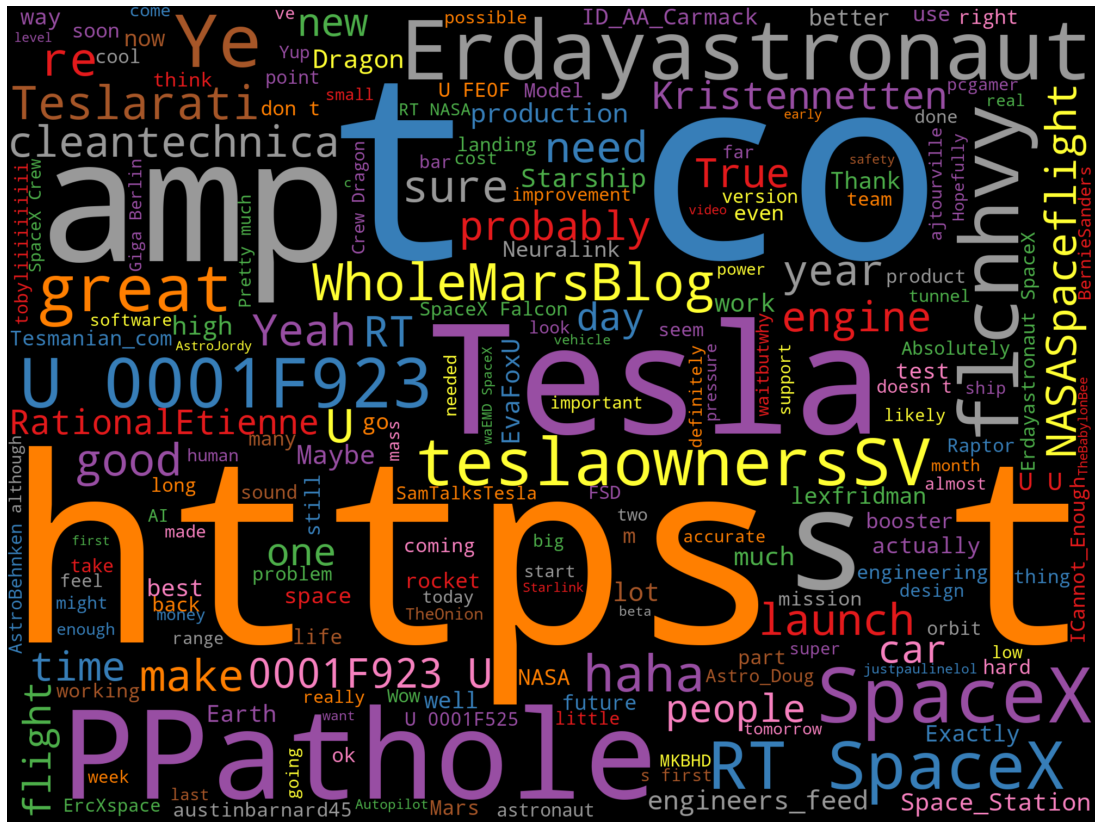

In [209]:
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width =2000, height = 1500,background_color='black',colormap='Set1',stopwords=stopwords).generate(df)
plt.figure(figsize=(20,15))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off');

<AxesSubplot:xlabel='score', ylabel='sentiment_df'>

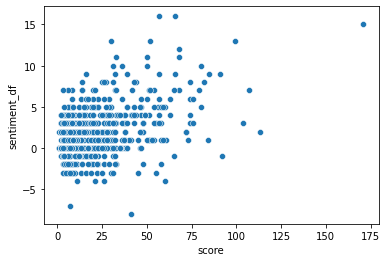

In [211]:
sns.scatterplot(x=conv_df['score'],y=conv_df['sentiment_df'])